In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

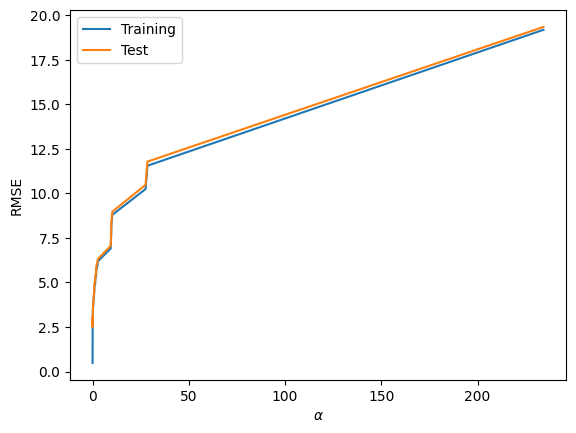

In [5]:
student_data = pd.read_csv(r"E:\data\student_performance.csv")

target_field = 'Performance Index'
input_fields = list(student_data.columns)
input_fields.remove(target_field)

# directly formatting Extracurricular Activities into 0, 1
student_data['Extracurricular Activities'] = student_data['Extracurricular Activities'].map({'Yes':1, 'No':0})

training_data, test_data = train_test_split(student_data
                                           ,test_size=0.25
                                           ,random_state=15)

model = DecisionTreeRegressor().fit(training_data[input_fields], training_data[target_field])

tree_score_metrics = pd.DataFrame(model.cost_complexity_pruning_path(training_data[input_fields], training_data[target_field]))

reg_values = tree_score_metrics.loc[tree_score_metrics['ccp_alphas'] >= 0, 'ccp_alphas']
training_score = {}
test_score = {}

for alpha in reg_values:
    model = DecisionTreeRegressor(random_state=13, ccp_alpha=alpha).fit(training_data[input_fields]
                                                                       ,training_data[target_field])

    training_score.update({alpha:root_mean_squared_error(training_data[target_field]
                                                        ,model.predict(training_data[input_fields])
                                                        )
                          })
    test_score.update({alpha:root_mean_squared_error(test_data[target_field]
                                                    ,model.predict(test_data[input_fields])
                                                     )
                      })

plt.plot(training_score.keys(), training_score.values(), label='Training')
plt.plot(test_score.keys(), test_score.values(), label='Test')
plt.ylabel('RMSE')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.show()